# Project: Investigate a Dataset
# TMDb Movie Database

## Amani Abbas

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I chose to investigate TMDb movie data, this data set contains information
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### This dataset contains:
> * 21 columns.
> * 10866 rows.

### Questions:
> 1. What kinds of properties are associated with movies that have high revenues?
> 2. What are the most frequent genres in the dataset?
> 3. What are the most frequent cast in the dataset?
> 4. Which movie has the highest profit?
    * Top 10 profitable movies
    * Budget average for top profitable movies
    * Directores with top profitable movies
    * Cast with top profitable movies
    * Genres with top profitable movies
    * Runtime average for top profitable movies
    * Keywords alligned with top profitable movies


In [1]:
# importing packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean dataset for analysis. 

### Assesing Data
### General Properties

In [2]:
# uploading data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# check if there is any duplicated rows
df.duplicated().sum()

1

In [5]:

# check how manu null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# unique valuse for each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.query('revenue == 0').count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [8]:
df.query('budget == 0').count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

> __Notes:__ From assessing the dataset we know that it contains many null values, especially: homepage, tagline, keywords, and production_companies columns, however, we are not going to use most of these columns in our analysis, we have 1 duplicated row, and a lot of 0 values in both revenue and budget columns.

### Data Cleaning

In [9]:
# drop the columns we will not use from the dataset
df.drop(['imdb_id','homepage', 'tagline', 'overview', 'production_companies', 'budget_adj', 'revenue_adj', 'release_date'], axis=1, inplace=True)

# confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015


In [10]:
# now null values are much less than before, and we will handle it during our analysis
df.isnull().sum()

id                   0
popularity           0
budget               0
revenue              0
original_title       0
cast                76
director            44
keywords          1493
runtime              0
genres              23
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [11]:
# remove duplicated rows
df.drop_duplicates(inplace=True)

# confirm changes
df.duplicated().sum()

0

In [12]:
# remove rows with null values
df.dropna(inplace=True)

# confirm changes
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
keywords          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [13]:
# remove movies with 0 revenue
df = df.drop(df.loc[df['revenue']==0].index)

In [14]:
# remove movies with 0 budget
df = df.drop(df.loc[df['budget']==0].index)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713 entries, 0 to 10848
Data columns (total 13 columns):
id                3713 non-null int64
popularity        3713 non-null float64
budget            3713 non-null int64
revenue           3713 non-null int64
original_title    3713 non-null object
cast              3713 non-null object
director          3713 non-null object
keywords          3713 non-null object
runtime           3713 non-null int64
genres            3713 non-null object
vote_count        3713 non-null int64
vote_average      3713 non-null float64
release_year      3713 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 406.1+ KB


> __Notes:__ Now our dataset is clean, we have:
* droped rows with null valus
* droped duplicated rows
* droped columns we will not use in our analysis
* droped rows where revenue or budget is 0

> After cleaning 13 columns left, with 3713 rows.

### Create needed tables and columns

In [16]:
# Create q1 table to answer questions about reveneu
# It include only comulmns needed to answer the questions
q1= df[['id', 'popularity', 'budget', 'revenue', 'original_title', 'director', 'runtime', 'release_year']]
q1.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,2015


In [17]:
# Add a column to the original dataset called 'profit'
# 'profit' = 'budget' - 'revenue'
df.insert(4, 'profit', df['revenue']-df['budget'])
df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015


In [18]:
# create a function to count and split columns with '|'

def split_it(column):
    split1 = column.str.cat(sep = '|')
    split2 = pd.Series(split1.split('|'))
    # arranging in descending order
    return split2.value_counts(ascending = False)

In [19]:
# Create a new table with top 10 profitable movies
# Create a teable with profit in ascending order
top10 = pd.DataFrame(df['profit'].sort_values(ascending = False))
# Take top 10
top10 = top10[:10]
# Get columns needed
top10['revenue']= df['revenue']
top10['budget']= df['budget']
top10['original_title']= df['original_title']
top10['director']= df['director']
top10['cast']= df['cast']
top10['genres']= df['genres']
top10['runtime']= df['runtime']
top10['keywords']= df['keywords']
top10

,profit,revenue,budget,original_title,director,cast,genres,runtime,keywords
1386,2544505847,2781505847,237000000,Avatar,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Action|Adventure|Fantasy|Science Fiction,162,culture clash|future|space war|space colony|so...
3,1868178225,2068178225,200000000,Star Wars: The Force Awakens,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,136,android|spaceship|jedi|space opera|3d
5231,1645034188,1845034188,200000000,Titanic,James Cameron,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,Drama|Romance|Thriller,194,shipwreck|iceberg|ship|panic|titanic
0,1363528810,1513528810,150000000,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,124,monster|dna|tyrannosaurus rex|velociraptor|island
4,1316249360,1506249360,190000000,Furious 7,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,137,car race|speed|revenge|suspense|car
4361,1299557910,1519557910,220000000,The Avengers,Joss Whedon,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Science Fiction|Action|Adventure,143,new york|shield|marvel comic|comic|superhero
3374,1202817822,1327817822,125000000,Harry Potter and the Deathly Hallows: Part 2,David Yates,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,Adventure|Family|Fantasy,130,self sacrifice|magic|frog|sorcerer|school
14,1125035767,1405035767,280000000,Avengers: Age of Ultron,Joss Whedon,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Action|Adventure|Science Fiction,141,marvel comic|comic|sequel|superhero|vision
5422,1124219009,1274219009,150000000,Frozen,Chris Buck|Jennifer Lee,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Animation|Adventure|Family,102,queen|musical|princess|betrayal|snowman
8094,1084279658,1106279658,22000000,The Net,Irwin Winkler,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Crime|Drama|Mystery|Thriller|Action,114,cheating|new identity|computer virus|chase|com...


<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the dataset we will start answering our questions.

### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

In [20]:
# the average of revenue
q1['revenue'].mean()

110437309.41610557

In [21]:
# the movie with the highest revenue
q1[q1['revenue'] == q1['revenue'].max()]

,id,popularity,budget,revenue,original_title,director,runtime,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,2009


In [22]:
# the movie with the lowest revenue
q1[q1['revenue'] == q1['revenue'].min()]

,id,popularity,budget,revenue,original_title,director,runtime,release_year
8142,2293,0.552091,6000000,2,Mallrats,Kevin Smith,94,1995


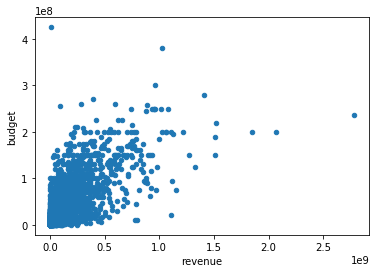

In [23]:
# revenue VS budget
q1.plot(x='revenue', y='budget', kind='scatter');

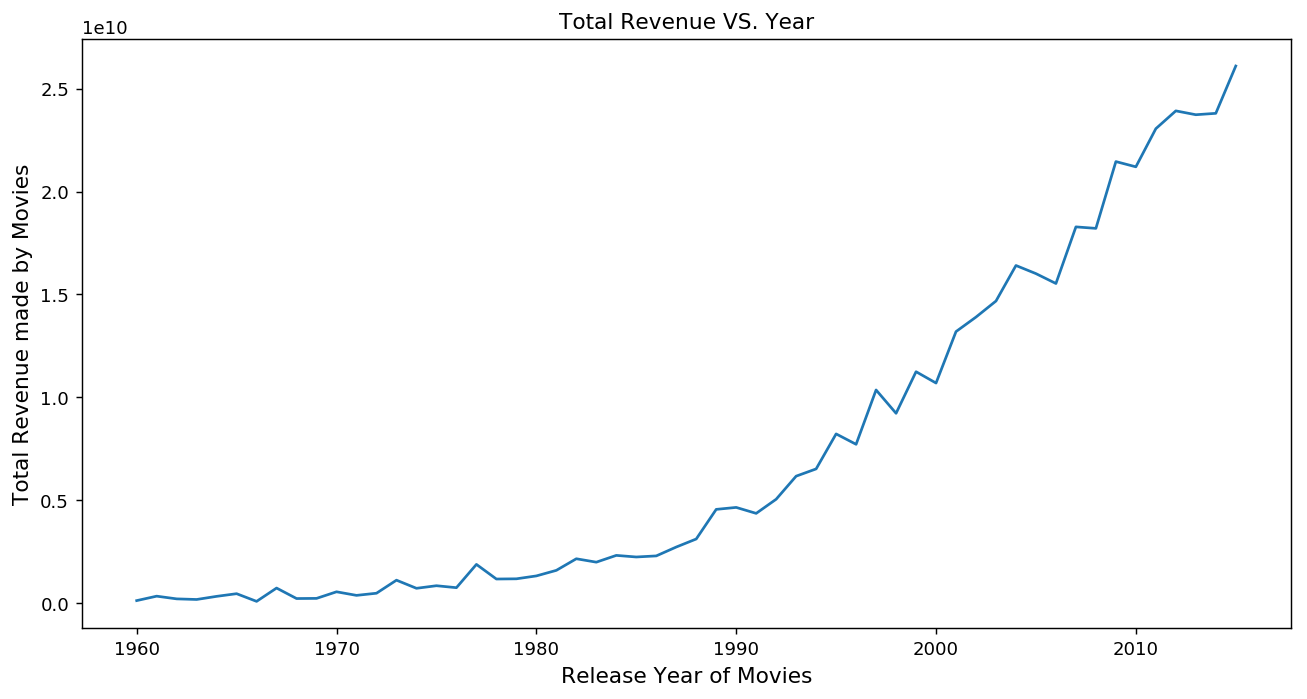

In [24]:
# revenue VS release_year
data = q1.groupby('release_year')['revenue'].sum()
plt.figure(figsize=(12,6), dpi = 130)

# labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
# labeling y-axis
plt.ylabel('Total Revenue made by Movies', fontsize = 12)
# title of a the plot
plt.title('Total Revenue VS. Year')

# plotting data
plt.plot(data)

#showing the plot
plt.show()

### Notes:
> 1. The average of movies revenue is: 110437309.41610557
> 2. The movie with the highest revenue is 'Avatar', for the director: James Cameron, with revenue of 2781505847
> 3. The movie with the lowest revenue is: 'Mallrats', for the director: Kevin Smith, with revenue of 2
> 4. There is a positive relationship between revenue and budget.
> 5. Revenue is increasing year by year and reached its maximum in 2015.


### Research Question 3  (Most Frequent Genres)

In [25]:
# most frequent genres
m_genres= split_it(df['genres'])
m_genres

Drama              1686
Comedy             1301
Thriller           1164
Action             1050
Adventure           729
Romance             635
Crime               629
Science Fiction     511
Horror              447
Family              408
Fantasy             386
Mystery             338
Animation           196
Music               128
History             126
War                 116
Western              51
Documentary          31
Foreign              10
TV Movie              1
dtype: int64

In [26]:
m_genres.count()

20

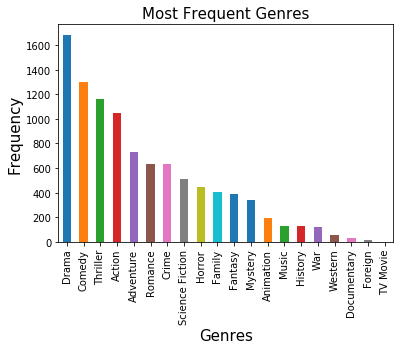

In [27]:
m_genres.plot.bar(title= 'Most Frequent Genres');

#On x-axis 
plt.xlabel('Genres', fontsize = 15)
#On y-axis 
plt.ylabel('Frequency', fontsize=15)
#Name of the bar
plt.title('Most Frequent Genres', fontsize=15)

plt.show()

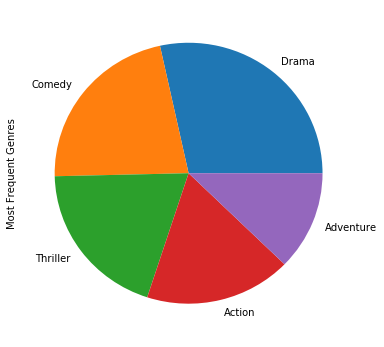

In [28]:
#top 5 genres
top_5_g= pd.Series(m_genres[:5],index=['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure'], name='Most Frequent Genres')
top_5_g.plot.pie(figsize=(6, 6));

### Notes:
> Movies are falling under 20 different genres:
> 1. The most frequent genre is: Drama, with the frequency of 1686
> 2. The less frequent genre is: TV Movie, with the frequency of 1

### Research Question 3  (Most Frequent Cast)

In [29]:
# recall the split_it function for cat column
m_cast= split_it(df['cast'])
m_cast.count()

6664

In [30]:
# we will choose 20 most frequent cast to plot
top_m_cast= m_cast[:20]
top_m_cast

Robert De Niro           50
Bruce Willis             46
Samuel L. Jackson        43
Nicolas Cage             42
Johnny Depp              35
Matt Damon               34
Morgan Freeman           34
Brad Pitt                34
Tom Hanks                34
Tom Cruise               33
Denzel Washington        32
Eddie Murphy             32
Harrison Ford            32
Sylvester Stallone       31
Mark Wahlberg            29
Arnold Schwarzenegger    29
Liam Neeson              29
Robin Williams           29
Owen Wilson              29
Meryl Streep             29
dtype: int64

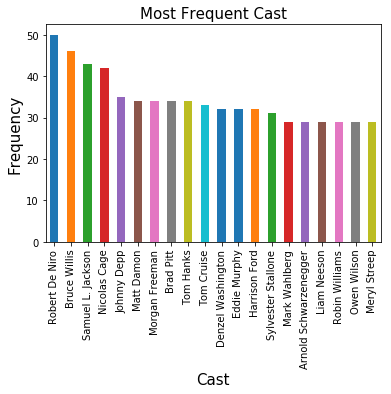

In [31]:
# plotting 20 most frequent cast
top_m_cast.plot.bar(title= 'Most Frequent Cast');

#On x-axis 
plt.xlabel('Cast', fontsize = 15)
#On y-axis 
plt.ylabel('Frequency', fontsize=15)
#Name of the bar
plt.title('Most Frequent Cast', fontsize=15)

plt.show()

### Notes:
> The dataset contains 19026 unique cast:
> 1. The most frequent cast is: Robert De Niro, with the frequency of 50
> 2. The second most frequent cast in not that far: Bruce Willis, with the frequency of 46

### Research Question 4  (Which movie has the highest profit?)

In [32]:
# look at the description of our new column
df['profit'].describe()

count    3.713000e+03
mean     7.263850e+07
std      1.526873e+08
min     -4.139124e+08
25%     -8.990950e+05
50%      2.098423e+07
75%      8.480000e+07
max      2.544506e+09
Name: profit, dtype: float64

In [33]:
# The movie with the highest profit
df[df['profit'] == df['profit'].max()]

,id,popularity,budget,revenue,profit,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009


In [34]:
# The movie with the lowest profit
df[df['profit'] == df['profit'].min()]

,id,popularity,budget,revenue,profit,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year
2244,46528,0.25054,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010


In [35]:
# The average of movies profit
df['profit'].mean()

72638504.19499058

### Notes:
> 1. The movie with the highest profit is 'Avatar', directed by 'James Cameron', with a profit of 2544505847
> 2. The movie with the lowest profit is 'The Warrior's Way', directed by 'Sngmoo Lee', with a profit of -413912431
> 3. The profit average is 72638504.19499058


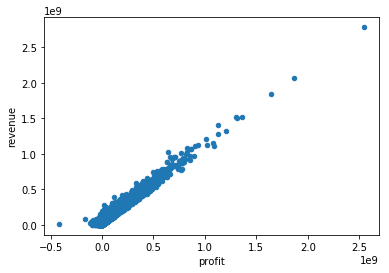

In [36]:
# profit VS revenue
df.plot(x='profit',y='revenue',kind='scatter');

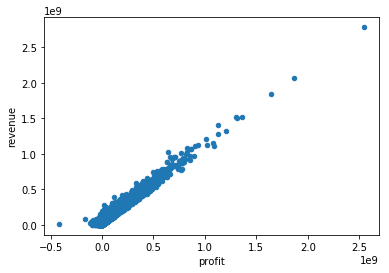

In [37]:
# profit VS budget
df.plot(x='profit',y='revenue',kind='scatter');

### Now after we have created this new column ```profit``` we can look for mor information
### * Top 10 profitable movies

In [38]:
top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1386 to 8094
Data columns (total 9 columns):
profit            10 non-null int64
revenue           10 non-null int64
budget            10 non-null int64
original_title    10 non-null object
director          10 non-null object
cast              10 non-null object
genres            10 non-null object
runtime           10 non-null int64
keywords          10 non-null object
dtypes: int64(4), object(5)
memory usage: 800.0+ bytes


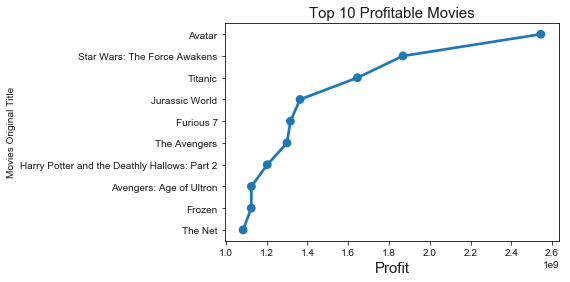

In [39]:
# plotting Top 10 Profitable movies using sns.pointplot

y= top10['profit']
x= top10['original_title']

pplot = sns.pointplot(x=y, y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})

#setup the title and labels of the plot
pplot.set_title("Top 10 Profitable Movies",fontsize = 15)
pplot.set_xlabel("Profit",fontsize = 15)
pplot.set_ylabel("Movies Original Title")
pplot
sns.set_style("darkgrid")

### * Budget average for top profitable movies

In [40]:
# The average (mean) of top 10 profitable movies' budget 
top10['budget'].mean()

177400000.0

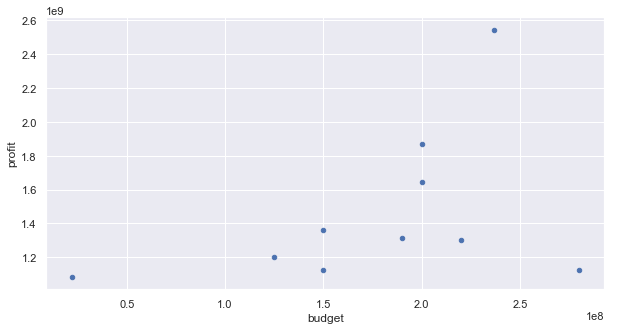

In [41]:
# visualizing buget with profit for top 10 profitable movies usint scatter plot
top10.plot(x='budget', y='profit', kind='scatter');

### * Directores with top profitable movies

In [42]:
# directors with top 10 profitable movies

top_d = split_it(top10['director'])
top_d

Joss Whedon        2
James Cameron      2
Colin Trevorrow    1
J.J. Abrams        1
Jennifer Lee       1
Chris Buck         1
Irwin Winkler      1
James Wan          1
David Yates        1
dtype: int64

In [43]:
top_d.count()

9

### * Cast with top profitable movies

In [44]:
# cast with top 10 prifitibal movies
top_c = split_it(top10['cast'])
top_c

Mark Ruffalo           2
Robert Downey Jr.      2
Scarlett Johansson     2
Michelle Rodriguez     2
Chris Hemsworth        2
Chris Evans            2
Dennis Miller          1
Emma Watson            1
Idina Menzel           1
Leonardo DiCaprio      1
Jonathan Groff         1
Sigourney Weaver       1
Chris Pratt            1
Jason Statham          1
Santino Fontana        1
Mark Hamill            1
Sam Worthington        1
Vin Diesel             1
Rupert Grint           1
Irrfan Khan            1
Daisy Ridley           1
Harrison Ford          1
Frances Fisher         1
Billy Zane             1
Adam Driver            1
Nick Robinson          1
Maggie Smith           1
Paul Walker            1
Ken Howard             1
Kate Winslet           1
Daniel Radcliffe       1
Bryce Dallas Howard    1
Wendy Gazelle          1
Kristen Bell           1
Carrie Fisher          1
Dwayne Johnson         1
Kathy Bates            1
Jeremy Northam         1
Zoe Saldana            1
Alan Rickman           1


In [45]:
top_c.count()

44

### * Genres with top profitable movies

In [46]:
top_g = split_it(top10['genres'])
top_g

Action             7
Adventure          7
Science Fiction    5
Thriller           4
Fantasy            3
Family             2
Drama              2
Crime              2
Animation          1
Romance            1
Mystery            1
dtype: int64

In [47]:
top_g.count()

11

### * Runtime average for top profitable movies

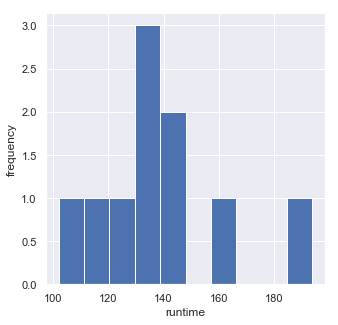

In [48]:
# create a historgram to show frequency of movies runtime for top 10 profitable movies 
runtime= top10['runtime']
runtime.hist(figsize= (5,5))
plt.xlabel('runtime')
plt.ylabel('frequency');

In [49]:
# The average (mean) of the top 10 profibtable movies' runtime
top10['runtime'].mean()

138.3

### * Keywords alligned with top profitable movies

In [50]:
top_k = split_it(top10['keywords'])
top_k

superhero            2
comic                2
marvel comic         2
ship                 1
betrayal             1
princess             1
suspense             1
sorcerer             1
car                  1
chase                1
sequel               1
monster              1
car race             1
future               1
iceberg              1
titanic              1
new identity         1
cheating             1
queen                1
self sacrifice       1
space war            1
jedi                 1
snowman              1
velociraptor         1
space colony         1
panic                1
spaceship            1
vision               1
computer virus       1
android              1
computer             1
magic                1
school               1
culture clash        1
dna                  1
society              1
new york             1
musical              1
speed                1
shipwreck            1
frog                 1
tyrannosaurus rex    1
shield               1
3d         

In [51]:
top_k.count()

47

<a id='conclusions'></a>
## Conclusions

> 1. Drama is the most popular genre, however, Action and Adventure are the most frequent genres with top 10 profitable movies.
> 2. The most frequent cast is: Robert De Niro, with the frequency of 50, however, he is not one of the cast in top 10 profitable movies cast.
> 3. These cast appeared in 2 different movies with top 10 profitable movies: Scarlett Johansson, Mark Ruffalo, Michelle Rodriguez, Robert Downey Jr., Chris Evans, Chris Hemsworth.
> 4. Directors with top profitable movies are: Joss Whedon and James Cameron, with 2 different movies for each.
> 5. The average runtime for top profitable movies is: 138.3
> 6. The average budget for top profitable movies is: 177400000

### Correlation

> * There is positive relationship between: 
> 1. Revenue and budget.
> 2. Profit and revenue.
> 3. Profit and budget.
> 4. Revenue is increasing year by year and reached its maximum in 2015.

### Limitations

> * Data contains many null values in different columns especially: homepage:7930, tagline:2824, keywords:1493 , and production_companies: 1030.
> * Revenue column contains 6016 rows with 0 value.
> * Budget column contains 5696 rows with 0 value.
> 
> Thus when we droped these null values and 0 values we dropped a lot of rows and our data dropped to less than the half.

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0